In [1]:
import psycopg2
import pandas as pd
import numpy as np


conn_string = "dbname='dbp90instance' port='3306' user='sr_user1' password='vigdata35' host='dbp90instance.cxanumxnk9py.eu-west-3.rds.amazonaws.com'"  

connection = psycopg2.connect(conn_string);

# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table

# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
technical_contribution = create_pandas_table("SELECT * from technical_contribution")



In [2]:
Positions = {"Central Midfielder": ['Right Center Midfield','Left Center Midfield',
                                'Center Midfield'],
         "Attacking Midfielder":['Center Attacking Midfield','Right Attacking Midfield', 
                                 'Left Attacking Midfield'],
        "Center Back":['Right Center Back','Left Center Back','Center Back'],
         "Winger":['Left Wing', 'Right Wing','Left Midfield','Right Midfield'],
         "Forward":['Left Center Forward','Center Forward','Right Center Forward'],
         "Right Full Back":['Right Back','Right Wing Back'],
         "Left Full Back":['Left Back','Left Wing Back'],
         "Defensive Midfielder":['Center Defensive Midfield','Left Defensive Midfield','Right Defensive Midfield'],
         'Goalkeeper':['Goalkeeper']}

pos=pd.DataFrame(pd.concat({k: pd.Series(v) for k, v in Positions.items()})).reset_index().set_axis(['position_group', 'NA', 'position'], axis=1, inplace=False)
del pos['NA']


In [2]:
print(technical_contribution.filter(regex='recent').columns)

Index(['player_season_most_recent_match'], dtype='object')


In [5]:
import psycopg2
import pandas as pd
import numpy as np
from datetime import datetime
from glob import glob
import json

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    if (d2==None)|(d2==''):
        d2 = d1
    else:
        d2 = datetime.strptime(d2, "%Y-%m-%d")
    return round(int((d1 - d2).days),2)

final_contri=technical_contribution.sort_values(by=['Season','Player_SB'], ascending=[True,True]).reset_index(drop=True)
final_contri['player_season_most_recent_match']=final_contri['player_season_most_recent_match'].str.split('T').str[0]

B=[]

for i in range(len(final_contri)):
    debut=days_between(final_contri['player_season_most_recent_match'][i], final_contri['birth_date'][i])
    B.append(debut)

A2=pd.DataFrame(B).set_axis(['Age'], axis=1, inplace=False)
final_contri=pd.merge(final_contri,A2,left_index=True, right_index=True)
final_contri['Age']=final_contri['Age']/365
final_contri['Age']=final_contri['Age'].replace(0,18, inplace=False)

In [16]:
print(technical_contribution.filter(regex='appea').columns)


Index(['player_season_appearances', 'player_season_starting_appearances'], dtype='object')


In [24]:
num_cols=list(technical_contribution.filter(regex='contr').columns)
object_cols=list(technical_contribution.select_dtypes(include=['object']))
object_cols=['Age','Team','Player_SB','season_name','League',
             'player_season_appearances', 'player_season_starting_appearances']
final_cols=object_cols+num_cols

In [25]:
final_contri1=final_contri[final_cols]
AR=final_contri1[final_contri1['Player_SB']=='Darwin Núñez'].T.reset_index()
AR
# Rating of a Team/League, Team Style, 

index              21849  \
0                                  Age          21.161644   
1                                 Team            Almería   
2                            Player_SB       Darwin Núñez   
3                          season_name          2019/2020   
4                               League  Spain - La Liga 2   
5            player_season_appearances                 32   
6   player_season_starting_appearances                 19   
7             progressive_contribution          39.502675   
8               finishing_contribution          74.447042   
9               defensive_contribution          39.910359   
10                 aerial_contribution          19.100568   
11                on_ball_contribution          61.428083   
12                  Total_contribution          56.526658   

                          46857                46858  \
0                     21.690411            21.917808   
1                       Benfica              Benfica   
2                  Darwin Núñez         Darwin Núñez   
3                     2020/2021            2020/2021   
4   Europe - UEFA Europa League  Portugal - Liga NOS   
5                             7                   29   
6                             5                   19   
7                     43.258474            33.616652   
8                     40.092555             57.13482   
9                     63.351619            73.245072   
10                    13.731624            34.550799   
11                    60.449213            69.422463   
12                    74.545353            83.389657   

                        79059                79060  
0                   22.739726            22.786301  
1                     Benfica              Benfica  
2                Darwin Núñez         Darwin Núñez  
3                   2021/2022            2021/2022  
4   Europe - Champions League  Portugal - Liga NOS  
5                           8                   22  
6                           4                   18  
7                   26.461356            76.309793  
8                   33.033974            90.419361  
9                   60.575945            51.978758  
10                  24.498417            18.324039  
11                  72.319293            61.633895  
12                  71.146385            75.234655

In [21]:
#df1=pd.read_feather('/Users/vignesh.jayanth/Tableau Reports/contribution.ftr')

 
# Opening JSON file 
data = pd.DataFrame([json.loads(line) for line in open('/Users/vignesh.jayanth/Tableau Reports/final_contri.json', 'r')])


In [22]:
data.head(5)

player_season_passing_ratio  player_season_carry_length  \
0                     0.279657                    0.167614   
1                     0.447978                    0.154689   
2                     0.420746                    0.089462   
3                     0.454978                    0.098363   
4                     0.620536                    0.203265   

   player_season_dribbled_past_90  player_season_shots_faced_90  \
0                        0.154085                           0.0   
1                        0.226075                           0.0   
2                        0.288825                           0.0   
3                        0.139010                           0.0   
4                        0.449644                           0.0   

   player_season_pressured_pass_length_ratio  player_season_crossing_ratio  \
0                                   0.322363                           0.0   
1                                   0.443252                           0.0   
2                                   0.440155                           0.0   
3                                   0.362837                           0.0   
4                                   0.639758                           0.0   

   player_season_deep_progressions_90  player_season_total_dribbles_90  \
0                            0.391076                         0.227265   
1                            0.221753                         0.433336   
2                            0.197184                         0.196056   
3                            0.673510                         0.203345   
4                            0.231222                         0.279786   

   player_season_counterpressures_90  player_season_aerial_wins_90  ...  \
0                           0.481220                      0.133713  ...   
1                           0.551739                      0.071630  ...   
2                           0.509713                      0.024126  ...   
3                           0.177536                      0.003361  ...   
4                           0.500084                      0.154931  ...   

   player_id  player_season_minutes  player_season_appearances  \
0       3908             2987.90010                         39   
1       4216             3280.95000                         41   
2       4207              974.11680                         27   
3       3398             3495.91670                         40   
4       4135              227.53334                          8   

   player_season_starting_appearances  progressive_contribution  \
0                                   3                 92.866252   
1                                   1                 82.921794   
2                                   1                 45.822257   
3                                   1                 71.846527   
4                                   0                 52.683363   

   finishing_contribution  defensive_contribution  aerial_contribution  \
0               92.181021               87.587607            50.891471   
1               95.382369               76.780980            27.262305   
2               98.847679               79.903947             9.182292   
3               91.453864               50.423654             1.279296   
4               75.839265              100.000000            58.966913   

   on_ball_contribution  Total_contribution  
0             77.955708          100.000000  
1             82.335438           94.354051  
2             83.665219           87.616720  
3            100.000000           84.478071  
4             65.804680           83.624914  

[5 rows x 135 columns]

In [3]:
#df1=pd.read_feather('/Users/vignesh.jayanth/Tableau Reports/contribution.ftr')
df1 = pd.DataFrame([json.loads(line) for line in open('/Users/vignesh.jayanth/Tableau Reports/final_contri.json', 'r')])


# Top 5 Leagues #

top5=['England-Premier League', 'France-Ligue 1','Germany-1. Bundesliga', 'Italy-Serie A','Spain-La Liga']

df1['League_Strength']=np.where(df1.League.isin(top5),'Top 5','Others')

# Sort by player_id and Season name #

df1=df1.sort_values(by=['Season','Player_SB'], ascending=[True,True]).reset_index(drop=True)
df1['player_season_most_recent_match']=df1['player_season_most_recent_match'].str.split('T').str[0]

B=[]

for i in range(len(df1)):
    debut=days_between(df1['player_season_most_recent_match'][i], df1['birth_date'][i])
    B.append(debut)

A2=pd.DataFrame(B).set_axis(['Age'], axis=1, inplace=False)
df1=pd.merge(df1,A2,left_index=True, right_index=True)

df1['Age']=df1['Age']/365
df1['Age']=df1['Age'].replace(0,18, inplace=False)

# Subset data for Age < 25 and made a transfer to a Top 5 League #- At some point made a transfer top the Top 5 leagues
int_leagues=df1[df1["League"].str.contains("North and Central America|South America|Coppa|Europe|Cup|Coupe|offs|Offs|OFFS|Pokal|Copa|Offs|International|Africa|Asia|Qualification")]

list_of_cups=list(int_leagues.League.unique())

df1['League_type']=np.where(df1["League"].isin(list_of_cups),'Internationl/Cup_comp','Domestic')
df1=df1[df1['League_type']=='Domestic'].reset_index(drop=True)



In [12]:
check=pd.DataFrame(df1.groupby(['Player_SB','position_group','Season','player_season_starting_appearances','League','Team','Age'])['Total_contribution'].sum()).reset_index()
check.to_json('/Users/vignesh.jayanth/Tableau Reports/check.json', orient='records', lines=True)


In [4]:
check = df1.filter(regex='appear')
print(check.columns)

Index(['player_season_appearances', 'player_season_starting_appearances'], dtype='object')


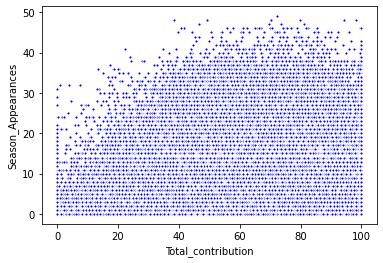

In [30]:
# Check the graph between season appearances and contribution #
import matplotlib.pyplot as plt
plt.scatter(df1.Total_contribution,df1.player_season_starting_appearances,color="b",edgecolors="w",zorder=20,alpha=1,s=10)
plt.xlabel("Total_contribution")
plt.ylabel("Season_Appearances")
plt.show()

In [31]:
max(df1.player_season_starting_appearances)

49

In [14]:
# Check the players playing now in the TOP 5 Leagues and under the age of 24 #
Others5=df1[(df1.League_Strength=='Others') & (df1.Season=='2019/2020') &
        (df1.Age<=22) & (df1.Total_contribution>=70)].reset_index(drop=True)    
    
#bin_labels = ['0-25', '26-50', '51-75', '75-100']
#Others5['Total_contribution_bins'] = pd.qcut(Others5['Total_contribution'],
#                              q=[0, 25, 50, 75, 100],
#                              labels=bin_labels)

all_player_ids=sorted(list(Others5.player_id.unique()))

# Use these player ids to check if they played in top Leagues in the years ahead #

TOP5=df1[(df1.League.isin(top5)) & (df1.Season>'2019') & 
        df1["player_id"].isin(all_player_ids)].reset_index(drop=True)
#TOP5['high_performing']=np.where(TOP5["player_id"].isin(all_player_ids),'Yes','No')


# Importing the Rankings Info # Read all the csv files from one folder

path = '/Users/vignesh.jayanth/Documents/League Rankings' # use your path
all_files = glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['season']=filename
    li.append(df)

Rankings = pd.concat(li, axis=0, ignore_index=True)


Rankings['season'] = Rankings['season'].str.split('/').str[5]
Rankings['season'] = Rankings['season'].str.split('.csv').str[0]
Rankings['league'] = Rankings['season'].str.split('_').str[0]
Rankings['season'] = Rankings['season'].str.split('_').str[1]

col         = 'league'
conditions  = [Rankings[col] == 'Italy - Serie A', Rankings[col] == 'England - Premier League', Rankings[col] == 'France - Ligue 1',Rankings[col] == 'Spain - La Liga',Rankings[col] == 'Germany - 1. Bundesliga']
choices     = ['Italy-Serie A','England-Premier League','France-Ligue 1','Spain-La Liga', 'Germany-1. Bundesliga']

Rankings["league"] = np.select(conditions, choices, default=np.nan)

col         = 'season'
conditions  = [Rankings[col] == '2020', Rankings[col] == '2021', Rankings[col] == '2019',Rankings[col] == '2018',Rankings[col] == '2017']
choices     = ["2020/2021", '2021/2022', '2019/2020','2018/2019','2017/2018']
    
Rankings["season"] = np.select(conditions, choices, default=np.nan)

Rankings=Rankings.rename(columns={'league':'League','season':'Season'})

final=pd.merge(TOP5,Rankings[['Team','League','Season','Rank']],on=['Season','League','Team'],how='left')
final['Rank']=final['Rank'].fillna(9)
final['Rank']=final['Rank'].astype(int)


cut_labels_4 = ['0-5', '6-10', '11-15', '16-20']
cut_bins = [0, 5, 10, 15, 20]
final['rank_range'] = pd.cut(final['Rank'], bins=cut_bins, labels=cut_labels_4)

# Subset for top 5 Ranking Teams #
#final_top5=final[final['rank_range']=='0-5'][['Team','Player_SB','position_group','Season','rank_range','Total_contribution']].reset_index(drop=True)
final_top5=final[['Team','Player_SB','player_id','position_group','Season','rank_range','Total_contribution']].reset_index(drop=True)
final_top5


Team              Player_SB  player_id        position_group  \
0             Granada         Antoñín Cortés      31983               Forward   
1          RB Leipzig            Daniel Olmo      16532  Attacking Midfielder   
2             FC Köln        Darko Churlinov      30322            Substitute   
3             Arsenal          Eddie Nketiah       3737               Forward   
4    Bayer Leverkusen  Edmond Fayçal Tapsoba      30606           Centre Back   
..                ...                    ...        ...                   ...   
105     VfB Stuttgart   Silas Katompa Mvumpa      13329                Winger   
106         AS Monaco     Strahinja Pavlović      27719           Centre Back   
107            Torino         Tommaso Pobega      30878  Defensive Midfielder   
108        Fiorentina          Youssef Maleh      31254    Central Midfielder   
109         Barcelona            Yusuf Demir      33357                Winger   

        Season rank_range  Total_contribution  
0    2019/2020       6-10           58.285069  
1    2019/2020        0-5           53.820702  
2    2019/2020      11-15           32.399339  
3    2019/2020       6-10           43.556902  
4    2019/2020        0-5           63.346960  
..         ...        ...                 ...  
105  2021/2022      16-20           19.799378  
106  2021/2022       6-10           76.838888  
107  2021/2022      11-15           65.959987  
108  2021/2022       6-10           66.347706  
109  2021/2022        0-5           39.777307  

[110 rows x 7 columns]

In [22]:
check=Others5[['Team','Player_SB','player_id','position_group','Season','Total_contribution']].reset_index(drop=True)
check=check[check['player_id']==33357].reset_index(drop=True)
check

Team    Player_SB  player_id        position_group     Season  \
0  Rapid Wien  Yusuf Demir      33357  Attacking Midfielder  2019/2020   

   Total_contribution  
0               100.0

In [23]:

check2=final_top5[final_top5['player_id']==33357].reset_index(drop=True)
check2

Team    Player_SB  player_id position_group     Season rank_range  \
0  Barcelona  Yusuf Demir      33357         Winger  2021/2022        0-5   

   Total_contribution  
0           39.777307

In [5]:
final['rank_range'].value_counts()                          

11-15    30
6-10     26
0-5      25
16-20    18
Name: rank_range, dtype: int64

In [28]:
# Check the players playing now in the TOP 5 Leagues #

TOP5=df1[(df1.League.isin(top5)) & (df1.Season=='2019/2020')].reset_index(drop=True)


In [30]:
all_player_ids=sorted(list(TOP5.player_id.unique()))


A=[]

for i in all_player_ids:
    
    check=df1[df1['player_id']==i].reset_index(drop=True)
    check=check.sort_values(by=['Season'], ascending=True).reset_index(drop=True)
#    check2 = pd.DataFrame([[np.nan] * len(check.columns)], columns=check.columns)
#    check = check2.append(check, ignore_index=True)

    check=check[['Team','League','Season','Country','position_group','player_season_starting_appearances','League_type','Total_contribution','season_id','player_id','Player_SB','League_Strength']]

    dict = {'Team': '', 'League': np.nan,'Season': '2021/2022','Total_contribution': '','season_id':''}

    check = check.append(dict, ignore_index = True)
    
    check['League']=check['League'].fillna(method='ffill')
    
    check['Transfers']=np.where((check['League']!=check['League'].shift(1)),'Transfer to','No transfer')
    check['Transfers']=np.where((check['League']!=check['League'].shift(-1)),'Transfer from',check['Transfers'])
        
    check.loc[[0, 0], 'Transfers'] = 'No transfer'
    check.loc[[len(check)-1, len(check)-1], 'Transfers'] = 'No transfer'
    
    check['Transfers_League']=check['Transfers']+' '+check['League_Strength']
    check['Transfers_League_shift']=check['Transfers_League'].shift(1)+' to '+check['Transfers_League']

    check=check[(check['Team']!='')].reset_index(drop=True)
    
#    check=check[(check['Transfers_League_shift']=='Transfer from Others to Transfer to Top 5')].reset_index(drop=True)

    check=check[['Team','League','Season','Total_contribution','position_group','player_season_starting_appearances','player_id','Player_SB','League_type','Transfers_League','Transfers_League_shift']]
    
    A.append(check)



In [25]:
A1=pd.concat(A).dropna()
A1=A1.sort_values(by=['player_id','Season'], ascending=True).reset_index(drop=True)

A2=A1[(A1['Transfers_League_shift']=='Transfer from Others to Transfer to Top 5')].reset_index(drop=True)
A2['player_id']=A2['player_id'].astype(int)
A2['player_season_starting_appearances']=A2['player_season_starting_appearances'].astype(int)
A3=A2[A2['player_season_starting_appearances']>=5].reset_index(drop=True)
p_ids=list(A3.player_id.unique())

# Get the player_ids and check their performance percentile now #
df_new=df1[df1['player_id'].isin(p_ids)].reset_index(drop=True)
check_cols = list(df_new.filter(regex='contribution|appearances|Age|League|Season|position_group|Team|Player_SB|player_id').columns)    
df_new=df_new[check_cols]


40.33424657534247

In [98]:
df_new.groupby(['Player_SB','position_group','Season','League','Age'])['Total_contribution'].sum()

Player_SB       position_group        Season     League                  Age      
Aaron Hickey    Left Full Back        2018/2019  Scotland-Premiership    16.950685    14.011864
                                      2019/2020  Scotland-Premiership    17.753425    27.907781
                                      2020/2021  Italy-Serie A           18.712329    38.736784
                                      2021/2022  Italy-Serie A           19.715068    48.992135
Aaron Lennon    Winger                2017/2018  England-Premier League  30.767123    26.726415
                                                                                        ...    
Óscar Trejo     Defensive Midfielder  2020/2021  Spain-La Liga 2         33.172603    73.160611
Óscar Valentín  Defensive Midfielder  2018/2019  Spain-La Liga 2         24.805479    95.905166
                                      2019/2020  Spain-La Liga 2         25.934247    57.302069
                                      2020/2021  Spai

In [65]:
check=A1[A1['Player_SB']=='Jaden Philogene-Bidace'].reset_index(drop=True)
check


Team                  League     Season Total_contribution  \
0   Stoke City    England-Championship  2021/2022          70.461805   
1  Aston Villa  England-Premier League  2021/2022           1.801195   

   player_id               Player_SB      Transfers_League  \
0    94325.0  Jaden Philogene-Bidace  Transfer from Others   
1    94325.0  Jaden Philogene-Bidace     Transfer to Top 5   

                      Transfers_League_shift  
0  No transfer Top 5 to Transfer from Others  
1  Transfer from Others to Transfer to Top 5

In [ ]:
import glob
# Importing the Rankings Info # Read all the csv files from one folder

path = '/Users/vignesh.jayanth/Documents/League Rankings' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    c1 = pd.read_csv(filename, index_col=None, header=0)
    c1['season']=filename
    li.append(c1)

Rankings = pd.concat(li, axis=0, ignore_index=True)

Rankings['season'] = Rankings['season'].str.split('/').str[5]
Rankings['season'] = Rankings['season'].str.split('.csv').str[0]
Rankings['league'] = Rankings['season'].str.split('_').str[0]
Rankings['season'] = Rankings['season'].str.split('_').str[1]

col         = 'season'
conditions  = [Rankings[col] == '2020', Rankings[col] == '2021', Rankings[col] == '2019',Rankings[col] == '2018',Rankings[col] == '2017']
choices     = ["2020/2021", '2021/2022', '2019/2020','2018/2019','2017/2018']
    
Rankings["season"] = np.select(conditions, choices, default=np.nan)
Rankings=Rankings.rename(columns={'league':'League','season':'Season'})
Rankings=Rankings[['Season','League','Team','Rank']]
# Pick necessary columns #

In [ ]:
# Subset data for Age < 25 and made a transfer to a Top 5 League #- At some point made a transfer top the Top 5 leagues


df3=df2[(df2['Age']<= 26) &(df2['Transfers']!='No_transfer')].reset_index(drop=True)

df3['Transfer_Leagues']=df3['Transfers']+'_'+df3['League_Strength']

df3=pd.merge(df3,Rankings,on=['League','Team','Season'],how='left')

Rank_groups = ['1-2', '3-4', '5-6', '6-10','10+']
cut_bins = [0, 2, 4, 6, 10,20]

df3['Rank_groups'] = pd.cut(df3['Rank'], bins=cut_bins, labels=Rank_groups)

# The number of Times a player has made a transfer #
interest=['Transfer_to_Top 5']
from_interest=['Transfer_from_Others']
ranks=['1-2', '3-4', '5-6', '6-10','10+']

transfer_to=df3[(df3['Transfer_Leagues'].isin(interest)) &
         (df3['Rank_groups'].isin(ranks))].reset_index(drop=True)

players_top5_transfer=list(transfer_to.player_id.unique())

transfer_from=df3[(df3['Transfer_Leagues'].isin(from_interest)) &
                   (df3['player_id'].isin(players_top5_transfer))].reset_index(drop=True)

All=transfer_from.append(transfer_to)


In [ ]:
check=All[All['Player_SB']=='Aurélien Tchouaméni']
check

In [ ]:
df.columns